In [64]:
import numpy as np
import pandas as pd

from graphs import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from ward import Ward

In [69]:
def RI(y_true, y_pred):
    good, bad = 0, 0
    for i in range(len(y_true)):
        for j in range(len(y_true)):
            if (y_true[i] == y_true[j]) == (y_pred[i] == y_pred[j]):
                good += 1
            else:
                bad += 1
    return good / (good + bad)

In [61]:
kekj = pd.read_csv('kekj.txt', '\t', header=None).as_matrix()
kekp = pd.read_csv('kekp.txt', '\t', header=None).as_matrix()

In [70]:
n_clusters=len(list(set(nodes)))
y_pred = Ward().predict(kekj, n_clusters)
RI(nodes, y_pred)

0.6355555555555555

In [71]:
n_clusters=len(list(set(nodes)))
y_pred = Ward().predict(kekp, n_clusters)
RI(nodes, y_pred)

0.6355555555555555

In [27]:
diff = (kekj - kekp)
np.abs(diff).max()

2.2204460492503131e-15

In [29]:
diff = (kekj - kekp) / (kekj + 0.00000000000000000000000000000000000001)
np.abs(diff).max()

2.2009510565214214e-15

In [35]:
def rq(D, nodes):
    points = []
    for i in range(D.shape[0]):
        for j in range(i + 1, D.shape[1]):
            points.append((D[i, j], nodes[i] == nodes[j]))
    points = sorted(points, key=lambda x: x[0])
    points = np.array(points)

    top_step = 1 / np.sum(points[:, 1])
    left_step = 1 / np.sum(points[:, 1] == 0)

    steps = [np.zeros(2)]
    for point in points:
        steps.append(steps[-1] + ((0, top_step) if point[1] else (left_step, 0)))
    return np.array(steps)

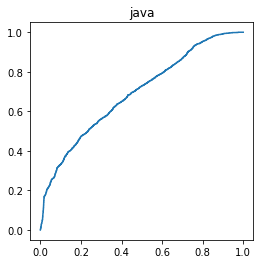

In [42]:
graphs, info = datasets.polbooks
edges, nodes = graphs[0]
stepsj = rq(kekj, nodes)
fig, ax = plt.subplots(1, figsize=(4, 4))
plt.plot(stepsj[:, 0], stepsj[:, 1])
plt.title('java')

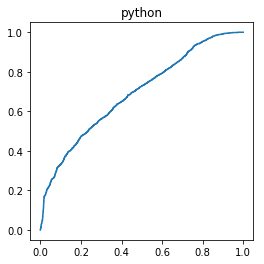

In [43]:
graphs, info = datasets.polbooks
edges, nodes = graphs[0]
stepsp = rq(kekp, nodes)
fig, ax = plt.subplots(1, figsize=(4, 4))
plt.plot(stepsp[:, 0], stepsp[:, 1])
plt.title('python')

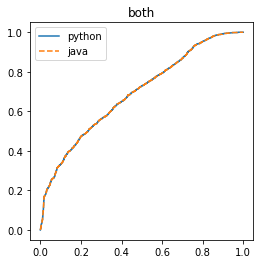

In [60]:
fig, ax = plt.subplots(1, figsize=(4, 4))
plt.plot(stepsp[:, 0], stepsp[:, 1], label='python')
plt.plot(stepsj[:, 0], stepsj[:, 1], '--', label='java')
plt.title('both')
plt.legend()